In [ ]:
import numpy as np
from scipy.optimize import brentq
import time
import matplotlib.pyplot as plt


def vse_nicle_bisekcija(f, a, b, korak, tol):

    nicla_seznam = []

    def bisekcija(f, x1, x2, tol):
        
        if f(x1) * f(x2) > 0:
            return None  

        # Klasična bisekcija
        while abs(x2 - x1) > tol:
            x_sredina = (x1 + x2) / 2
            y_sredina = f(x_sredina)

            if abs(y_sredina) < tol:
                return x_sredina
            if f(x1) * y_sredina < 0:
                x2 = x_sredina
            else:
                x1 = x_sredina

        return (x1 + x2) / 2

    # "Skeniranje" intervala [a, b] s koraki po "korak"
    x_levo = a
    while x_levo < b:
        x_desno = x_levo + korak
        if x_desno > b:
            x_desno = b

        
        if f(x_levo)*f(x_desno) < 0:
            
            x_zero = bisekcija(f, x_levo, x_desno, tol)
            if x_zero is not None:
                # Dodamo v seznam, če je dovolj daleč od zadnje
                nicla_seznam.append(x_zero)

        x_levo = x_desno

    # **Odstranitev podvojenih rešitev**: uredimo seznam in združimo zelo bližnje rešitve
    nicla_seznam.sort()
    koncni = []
    for xk in nicla_seznam:
        if not koncni:
            koncni.append(xk)
        else:
            # Če je ta ničla blizu zadnje shranjene (znotraj 10*tol), jih združimo
            if abs(xk - koncni[-1]) < 10*tol:
                nova_vrednost = 0.5*(xk + koncni[-1])
                koncni[-1] = nova_vrednost
            else:
                koncni.append(xk)

    return koncni




def vse_nicle_regulafalsi(f, a, b, korak, tol):

    nicla_seznam = []
    
    def regula_falsi(f, x1, x2, tol):
        if f(x1)*f(x2) > 0:
        
            return None

    
        while abs(x2 - x1) > tol:
            denom = f(x2) - f(x1)
            if abs(denom) < 1e-12:
                return (x1 + x2) / 2.0  # Preprečimo deljenje z 0

            c = x1 - f(x1)*(x2 - x1)/denom

            if abs(f(c)) < tol:
                return c

            if f(x1)*f(c) < 0:
                x2 = c
            else:
                x1 = c

        return (x1 + x2)/2.0

    
    x_levo = a
    while x_levo < b:
        x_desno = x_levo + korak
        if x_desno > b:
            x_desno = b

        f_levo = f(x_levo)
        f_desno = f(x_desno)

        
        if f_levo*f_desno < 0:
            nicla = regula_falsi(f, x_levo, x_desno, tol)
            if nicla is not None:
                je_blizu = False
                for ze_obstojeca in nicla_seznam:
                    if abs(nicla - ze_obstojeca) < 10*tol:
                        je_blizu = True
                        break
                if not je_blizu:
                    nicla_seznam.append(nicla)

        x_levo = x_desno

    # Za vsak primer uredimo po velikosti
    nicla_seznam.sort()
    return nicla_seznam


import numpy as np
from scipy.optimize import brentq

def vse_nicle_brentq(f, a, b, korak, tol=1e-8):
    
    nicla_seznam = []

    x_levo = a
    while x_levo < b:
        x_desno = x_levo + korak
        if x_desno > b:
            x_desno = b
        
        f_levo = f(x_levo)
        f_desno = f(x_desno)
        
        if abs(f_levo) < tol:
            # Dodamo le, če je nova
            je_blizu = any(abs(x_levo - z) < 10*tol for z in nicla_seznam)
            if not je_blizu:
                nicla_seznam.append(x_levo)
        elif abs(f_desno) < tol:
            je_blizu = any(abs(x_desno - z) < 10*tol for z in nicla_seznam)
            if not je_blizu:
                nicla_seznam.append(x_desno)

        if f_levo * f_desno < 0:
            try:
                koren = brentq(f, x_levo, x_desno, xtol=tol, rtol=tol)
                # Preverimo, ali smo ga že ujeli (duplikat?)
                je_blizu = any(abs(koren - z) < 10*tol for z in nicla_seznam)
                if not je_blizu:
                    nicla_seznam.append(koren)
            except ValueError:
                pass
        
        x_levo = x_desno

    nicla_seznam.sort()

    koncni = []
    for x_koren in nicla_seznam:
        if not koncni:
            koncni.append(x_koren)
        else:
            if abs(x_koren - koncni[-1]) < 10*tol:
                koncni[-1] = 0.5*(x_koren + koncni[-1])
            else:
                koncni.append(x_koren)

    return koncni




def poly1(x):
    #return x**3 - 6*x**2 + 11*x - 6  # Roots: 1, 2, 3
    return x**3 - 8*x**2 + 20.75*x - 17.5  # Roots: 2, 2.5, 3.5


# Iskanje ničel za poly1
tol = 1e-6
roots_brentq = vse_nicle_brentq(poly1, 0, 4, 0.15, tol)
roots_regule_false = vse_nicle_regulafalsi(poly1, 0, 4, 0.15, tol)
roots_bisekcija = vse_nicle_bisekcija(poly1, 0, 4, 0.15, tol)
#roots_numpy_poly1 = np.roots([1, -53, 3, -76])
roots_numpy_poly1 = np.roots([1, -8, 20.75, -17.5])
roots_numpy_poly = np.sort(roots_numpy_poly1)


print("Roots of poly1 using regula_falsi:", roots_regule_false)
print("Roots of poly1 using Brent's method:", roots_brentq)
print("Roots of poly1 using NumPy:", roots_numpy_poly)
print("Roots of poly1 using bisekcija:", roots_bisekcija)

Roots of poly1 using regula_falsi: [2.0000003850309818, 2.499999521287221, 3.499999444957138]
Roots of poly1 using Brent's method: [2.000000077680705, 2.500000271151708, 3.499999999311644]
Roots of poly1 using NumPy: [2.  2.5 3.5]
Roots of poly1 using bisekcija: [1.9999992370605464, 2.499998474121093, 3.500000381469725]


Analitični koreni (Cardano):
3.4999999999999964
1.9999999999999951
2.500000000000008

Primerjava (razlika med analitičnimi in numeričnimi koreni):
Analitično: 2.0000000000, Numerično: 2.0000000777, Razlika: 7.77e-08
Analitično: 2.5000000000, Numerično: 2.5000002712, Razlika: 2.71e-07
Analitično: 3.5000000000, Numerično: 3.4999999993, Razlika: 6.88e-10
            Analitični  Bisekcija  Regula falsi  numpy.roots
Korenski 1         2.0   1.999999      2.000000          2.0
Korenski 2         2.5   2.499998      2.500000          2.5
Korenski 3         3.5   3.500000      3.499999          3.5


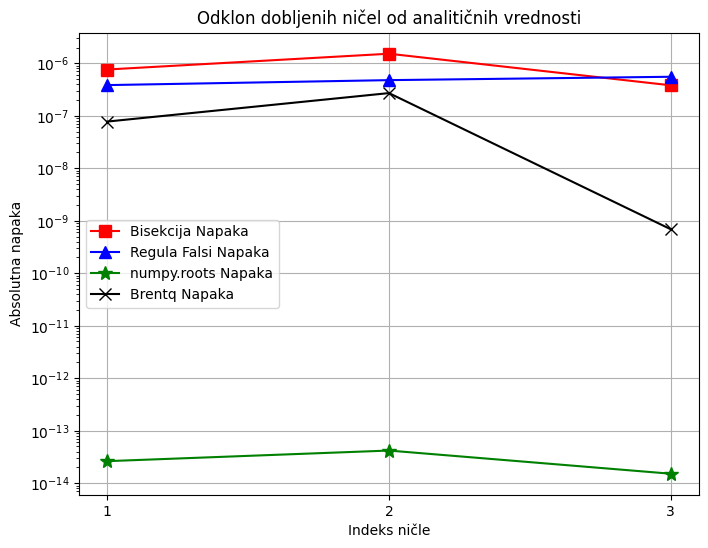

In [ ]:
import math
import cmath
import numpy as np
import pandas as pd
from scipy.optimize import brentq

def cardano_roots(a2, a1, a0):
    
    p = a1 - (a2**2) / 3.0
    q = (2 * (a2**3)) / 27.0 - (a2 * a1) / 3.0 + a0

    Delta = (q/2.0)**2 + (p/3.0)**3

    roots = []
    if Delta > 1e-12:
        u = np.cbrt(-q/2.0 + math.sqrt(Delta))
        v = np.cbrt(-q/2.0 - math.sqrt(Delta))
        x1 = u + v - a2/3.0
       
        omega = complex(-0.5, math.sqrt(3)/2)
        x2 = u * omega + v * (omega**2) - a2/3.0
        x3 = u * (omega**2) + v * omega - a2/3.0
        roots = [x1, x2, x3]
    elif abs(Delta) < 1e-12:
        # Δ ≈ 0, vsi koreni so realni; vsaj dva sta enaka.
        u = np.cbrt(-q/2.0)
        x1 = 2*u - a2/3.0
        x2 = -u - a2/3.0
        roots = [x1, x2, x2]  # x2 je dvojni koren
    else:
        # Δ < 0, vsi trije koreni so realni in različni.
        r = 2 * math.sqrt(-p/3.0)
        
        cos_phi = -q/2.0 / math.sqrt((-p/3.0)**3)
        # Zaradi numerične stabilnosti omejimo cos_phi na [-1,1]
        cos_phi = max(min(cos_phi, 1), -1)
        phi = math.acos(cos_phi)
        y1 = r * math.cos(phi/3.0)
        y2 = r * math.cos((phi + 2*math.pi) / 3.0)
        y3 = r * math.cos((phi + 4*math.pi) / 3.0)
        x1 = y1 - a2/3.0
        x2 = y2 - a2/3.0
        x3 = y3 - a2/3.0
        roots = [x1, x2, x3]
    return roots


#cardano_vals = cardano_roots(-6, 11, -6)
cardano_vals = cardano_roots(-8, 20.75, -17.5)
print("Analitični koreni (Cardano):")
for r in cardano_vals:
    print(r)


print("\nPrimerjava (razlika med analitičnimi in numeričnimi koreni):")

cardano_real = []
for r in cardano_vals:
    if abs(r.imag) < 1e-8 if isinstance(r, complex) else True:
        cardano_real.append(r.real if isinstance(r, complex) else r)
cardano_real.sort()

for ar, nr in zip(cardano_real, roots_brentq):
    diff = abs(ar - nr)
    print(f"Analitično: {ar:.10f}, Numerično: {nr:.10f}, Razlika: {diff:.2e}")
    
  
data = {
    "Analitični": cardano_real,
    "Bisekcija": roots_bisekcija,
    "Regula falsi": roots_regule_false,
    "numpy.roots": roots_numpy_poly
}

df = pd.DataFrame(data, index=["Korenski 1", "Korenski 2", "Korenski 3"])
print(df)


cardano_real = np.array(cardano_real)
roots_bisekcija = np.array(roots_bisekcija)
roots_regule_false = np.array(roots_regule_false)
roots_numpy_poly = np.array(roots_numpy_poly)
roots_brentq = np.array(roots_brentq)

error_bisekcija = np.abs(roots_bisekcija - cardano_real)
error_regulfalsi = np.abs(roots_regule_false - cardano_real)
error_numpy = np.abs(roots_numpy_poly - cardano_real)
errot_brentq = np.abs(roots_brentq - cardano_real)

indices = np.arange(1, 4)

plt.figure(figsize=(8, 6))
plt.plot(indices, error_bisekcija, 'rs-', label='Bisekcija Napaka', markersize=8)
plt.plot(indices, error_regulfalsi, 'b^-', label='Regula Falsi Napaka', markersize=8)
plt.plot(indices, error_numpy, 'g*-', label='numpy.roots Napaka', markersize=10)
plt.plot(indices, errot_brentq, 'kx-', label='Brentq Napaka', markersize=8)

plt.xlabel('Indeks ničle')
plt.ylabel('Absolutna napaka')
plt.yscale('log')
plt.title('Odklon dobljenih ničel od analitičnih vrednosti')
plt.xticks(indices)
plt.legend()
plt.grid(True)
#plt.savefig('roots_error2.png')
plt.show()


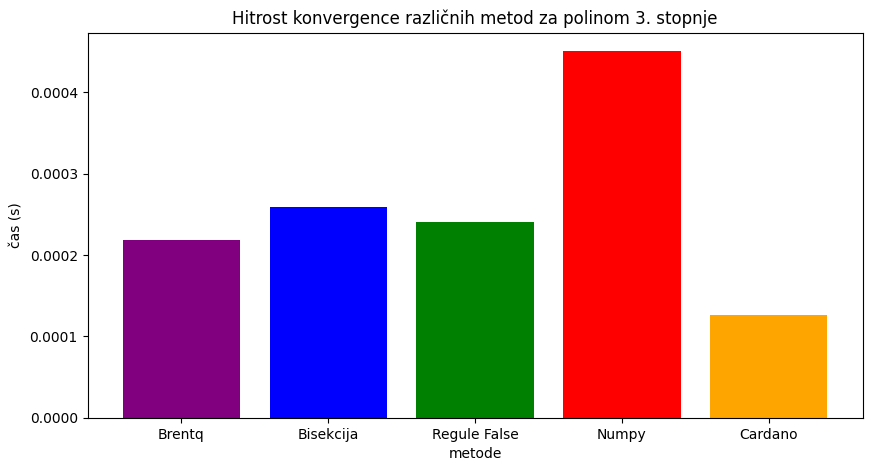

In [ ]:
# Testiranje hitrosti izvajanja različnih metod
starttime = time.perf_counter()
brentq(poly1, 0, 4)
brentq_time = time.perf_counter() - starttime

starttime = time.perf_counter()
vse_nicle_bisekcija(poly1, 0, 4, 0.15, tol)
bisekcija_time = time.perf_counter() - starttime

starttime = time.perf_counter()
vse_nicle_regulafalsi(poly1, 0, 4, 0.15, tol)
regule_false_time = time.perf_counter() - starttime

starttime = time.perf_counter()
vse_nicle_brentq(poly1, 1, 3, 0.15, tol)
brentq_time = time.perf_counter() - starttime

starttime = time.perf_counter()
#np.roots([1, -6, 11, -6])
np.roots([1, -8, 20.75, -17.5])
numpy_time = time.perf_counter() - starttime

starttime = time.perf_counter()
#cardano_roots(-6, 11, -6)
cardano_roots(-8, 20.75, -17.5)
cardano_time = time.perf_counter() - starttime

methods = ['Brentq', 'Bisekcija', 'Regule False', 'Numpy', 'Cardano']
times = [brentq_time, bisekcija_time, regule_false_time, numpy_time, cardano_time]

plt.figure(figsize=(10, 5))
plt.bar(methods, times, color=['purple', 'blue', 'green', 'red', 'orange'])
plt.xlabel('metode')
plt.ylabel('čas (s)')
plt.title('Hitrost konvergence različnih metod za polinom 3. stopnje')
#plt.savefig('speed_convergence2.png')
plt.show()


neskončnost func2:  23.260000000000836
povrsina simpsonova (func1) : 1.3333333333333413 cas:  0.069433500058949 s
povrsina trapezna (func1) : 1.3333333331999908 cas:  0.05389220011420548 s
povrsina scipy quad (func1) : (1.3333333333333335, 1.4802973661668755e-14) cas:  0.00019439985044300556 s
povrsina boolova (func1) : 1.333333333333355 cas:  0.0672029999550432 s
povrsina romberg (func1) : 1.3333333333333333 cas:  0.0005415000487118959 s


povrsina simpsonova (func2) : 5.999998864331965 cas:  0.3138436998706311 s
povrsina trapezna (func2) : 5.999998864331945 cas:  0.28337389999069273 s
povrsina scipy quad (func2) : (5.9999988643320625, 7.441946512504183e-08) cas:  0.0003549999091774225 s
povrsina boolova (func2) : 5.999998864332046 cas:  0.32869859994389117 s
povrsina romberg (func2) : 5.99999886433206 cas:  0.0019189000595360994 s


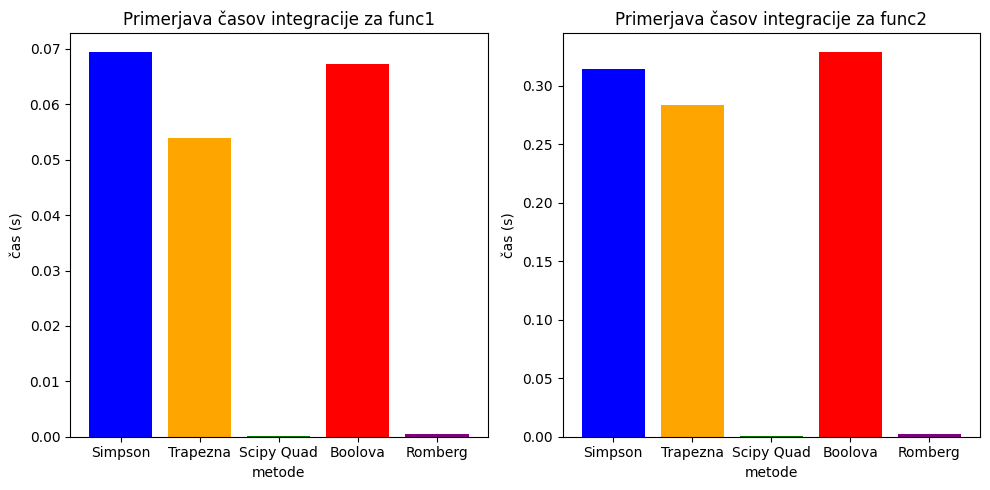

Primerjava natančnosti za func1 (Simpson, Trapezna, Boolova, Romberg): [5.828670879282071e-15, 1.0000700267909223e-10, 1.6153745008296025e-14, np.float64(1.6653345369377346e-16)]
Primerjava natančnosti za func2 (Simpson, Trapezna, Boolova, Romberg): [np.float64(1.6283274109901017e-14), np.float64(1.953992893188122e-14), np.float64(2.8125655280738118e-15), np.float64(4.440892939063914e-16)]


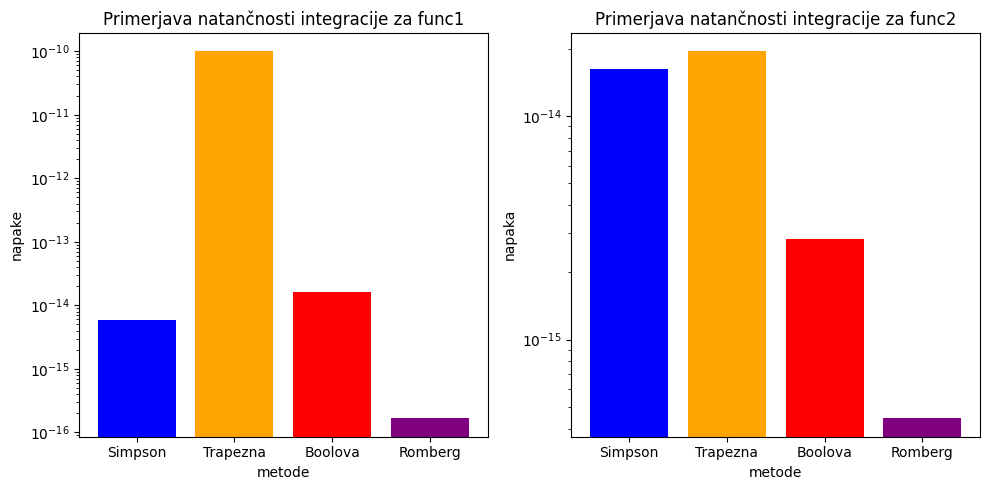

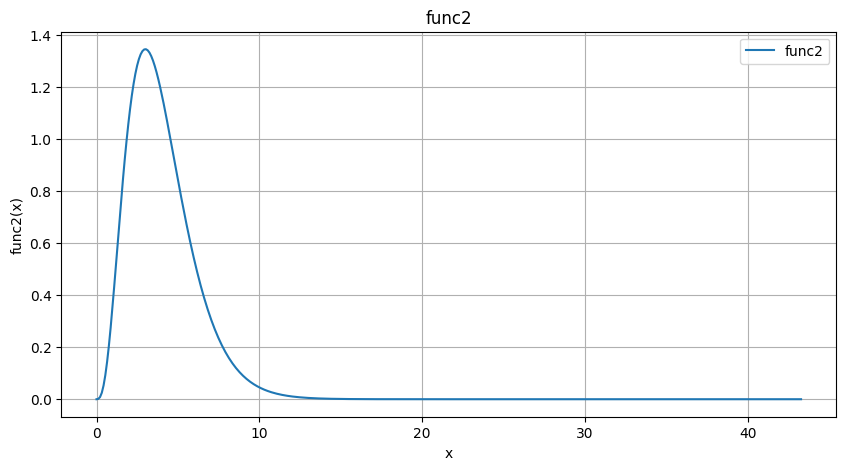

In [ ]:
import numpy as np
import scipy.integrate as scint
import time

def trapezna(f, a, b, n):
    h = (b - a) / n
    s = 0.5 * (f(a) + f(b))
    
    for i in range(1, n):
        s += f(a + i * h)
        
    return s * h

def simpson(f, a, b, n):
    if n % 2 == 1: # n mora biti sodo
        n += 1
    h = (b - a) / n
    s = f(a) + f(b)

    for i in range(1, n):
        coef = 4 if i % 2 == 1 else 2
        s += coef * f(a + i * h)

    return s * h / 3.0

def boolova(f, a, b, n):
    if n % 4 != 0:  # n mora biti deljivo s 4
        n += 4 - n % 4
    h = (b - a) / n
    s = 7 * (f(a) + f(b))

    for i in range(1, n):
        if i % 4 == 0:
            coef = 14
        elif i % 2 == 1:
            coef = 32
        else:
            coef = 12
        s += coef * f(a + i * h)

    return s * 2 * h / 45.0


def romberg(f, a, b, n):
    if n < 2:
        raise ValueError("n mora biti vsaj 2")
    
    r = np.zeros((n, n))
    h = b - a
    r[0, 0] = 0.5 * h * (f(a) + f(b))  

    for i in range(1, n):
        h /= 2
        s = sum(f(a + k * h) for k in range(1, 2**i, 2))  
        r[i, 0] = 0.5 * r[i - 1, 0] + s * h  

        for j in range(1, i + 1):  
            r[i, j] = r[i, j - 1] + (r[i, j - 1] - r[i - 1, j - 1]) / (4**j - 1)

    return r[n - 1, n - 1]  


def func1(x):
    return 1 - x**2

def func2(x):
    return x**3 * np.exp(-x)

def neskončnost(f, r, korak, eps):
    i = 1.0  
    while i < r:
        d = abs(f(i) - 0)  
        if d < eps:
            return i
        i += korak  
    return int(r) 

neskonc = neskončnost(func2, 1000, 0.01, 1e-6)
print("neskončnost func2: ", neskonc)

meja_a1 = -1.0
meja_b1 = 1.0

meja_a2 = 0.0
meja_b2 = neskonc

koraki = 100000

starttime = time.perf_counter()
simps = simpson(func1, meja_a1, meja_b1, koraki)
simps_time = time.perf_counter() - starttime
print("povrsina simpsonova (func1) :", simps, "cas: ", simps_time, "s")

starttime = time.perf_counter()
trap = trapezna(func1, meja_a1, meja_b1, koraki)
trap_time = time.perf_counter() - starttime
print("povrsina trapezna (func1) :", trap, "cas: ", trap_time, "s")

starttime = time.perf_counter()
scipy = scint.quad(func1, meja_a1, meja_b1)
scipy_time = time.perf_counter() - starttime
print("povrsina scipy quad (func1) :", scipy, "cas: ", scipy_time, "s")

starttime = time.perf_counter()
bools = boolova(func1, meja_a1, meja_b1, koraki)
bools_time = time.perf_counter() - starttime
print("povrsina boolova (func1) :", bools, "cas: ", bools_time, "s")

starttime = time.perf_counter()
romb = romberg(func1, meja_a1, meja_b1, 10)
romb_time = time.perf_counter() - starttime
print("povrsina romberg (func1) :", romb, "cas: ", romb_time, "s")

print("\n")

starttime = time.perf_counter()
simps2 = simpson(func2, meja_a2, meja_b2, koraki)
simps_time2 = time.perf_counter() - starttime
print("povrsina simpsonova (func2) :", simps2, "cas: ", simps_time2, "s")

starttime = time.perf_counter()
trap2 = trapezna(func2, meja_a2, meja_b2, koraki)
trap_time2 = time.perf_counter() - starttime
print("povrsina trapezna (func2) :", trap2, "cas: ", trap_time2, "s")

starttime = time.perf_counter()
scipy2 = scint.quad(func2, meja_a2, meja_b2)
scipy_time2 = time.perf_counter() - starttime
print("povrsina scipy quad (func2) :", scipy2, "cas: ", scipy_time2, "s")

starttime = time.perf_counter()
bools2 = boolova(func2, meja_a2, meja_b2, koraki)
bools_time2 = time.perf_counter() - starttime
print("povrsina boolova (func2) :", bools2, "cas: ", bools_time2, "s")

starttime = time.perf_counter()
romb2 = romberg(func2, meja_a2, meja_b2, 10)
romb_time2 = time.perf_counter() - starttime
print("povrsina romberg (func2) :", romb2, "cas: ", romb_time2, "s")

import matplotlib.pyplot as plt


methods = ['Simpson', 'Trapezna', 'Scipy Quad', 'Boolova', 'Romberg']
times_func1 = [simps_time, trap_time, scipy_time, bools_time, romb_time]
times_func2 = [simps_time2, trap_time2, scipy_time2, bools_time2, romb_time2]


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(methods, times_func1, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('metode')
plt.ylabel('čas (s)')
if koraki > 500000:
    plt.yscale('log')
plt.title('Primerjava časov integracije za func1')


plt.subplot(1, 2, 2)
plt.bar(methods, times_func2, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('metode')
plt.ylabel('čas (s)')
if koraki > 500000:
    plt.yscale('log')
plt.title('Primerjava časov integracije za func2')

plt.tight_layout()
#plt.savefig('time_comparison.png')
plt.show()


compare_func1 = [abs(simps - scipy[0])/scipy[0], abs(trap - scipy[0])/scipy[0], abs(bools - scipy[0])/scipy[0], abs(romb - scipy[0])/scipy[0]]
print("Primerjava natančnosti za func1 (Simpson, Trapezna, Boolova, Romberg):", compare_func1)


compare_func2 = [abs(simps2 - scipy2[0])/scipy2[0], abs(trap2 - scipy2[0])/scipy2[0], abs(bools2 - scipy2[0])/scipy2[0], abs(romb2 - scipy2[0])/scipy2[0]]
print("Primerjava natančnosti za func2 (Simpson, Trapezna, Boolova, Romberg):", compare_func2)


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.bar(['Simpson', 'Trapezna', 'Boolova', 'Romberg'], compare_func1, color=['blue', 'orange', 'red', 'purple'])
plt.xlabel('metode')
plt.ylabel('napake')
plt.yscale('log')
plt.title('Primerjava natančnosti integracije za func1')


plt.subplot(1, 2, 2)
plt.bar(['Simpson', 'Trapezna', 'Boolova', 'Romberg'], compare_func2, color=['blue', 'orange', 'red', 'purple'])
plt.xlabel('metode')
plt.ylabel('napaka')
plt.yscale('log')
plt.title('Primerjava natančnosti integracije za func2')

plt.tight_layout()
#plt.savefig('accuracy_comparison.png')
plt.show()


x = np.linspace(meja_a2, meja_b2 + 20, 400)
y = func2(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='func2')
plt.xlabel('x')
plt.ylabel('func2(x)')
plt.title('func2')
plt.legend()
plt.grid(True)
#plt.savefig('func2.png')
plt.show()

